# Simulation Result - The Attention Distribution

### Step 1: Scatter dot distributions on the geometry map

In [1]:
# Load the updated CSV file to get the data
file_path_updated = '11-29-09-39/11-29-09-39-study4_data.csv' #'11-27-09-study4_data.csv'    # The very original dataset: 11-26-16-study4_data.csv

# Get the row index
row_index = 1000

# Get the temporal prefix
last_hyphen_index = file_path_updated.rfind('-')
prefix = file_path_updated[:last_hyphen_index]

if '/' in prefix:
    prefix = prefix.split('/')[0]

In [2]:
prefix

'11-29-09-39'

### Make the annotation clearer. Use walking positions to differentiate left and right rectangles. Add them to the legends. Add signs.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

# Load the updated CSV file to get the data
# file_path_updated = '11-27-09-study4_data.csv'    # The very original dataset: 11-26-16-study4_data.csv
data_updated = pd.read_csv(file_path_updated)

# Function to convert string representations of lists into actual lists
def literal_eval_col(col):
    return col.apply(literal_eval)

# Apply the literal_eval function to the columns that contain string representations of lists
data_updated['steps'] = literal_eval_col(data_updated['steps'])
data_updated['step_wise_walking_positions'] = literal_eval_col(data_updated['step_wise_walking_positions'])
data_updated['step_wise_walking_speeds'] = literal_eval_col(data_updated['step_wise_walking_speeds'])
data_updated['step_wise_attentions'] = literal_eval_col(data_updated['step_wise_attentions'])
data_updated['sign_positions'] = literal_eval_col(data_updated['sign_positions'])
data_updated['step_wise_reading_ratios'] = literal_eval_col(data_updated['step_wise_reading_ratios'])

# # Extract the walking positions and attentions for each step
# walking_positions = np.concatenate(data_updated['step_wise_walking_positions'].tolist())
# attentions = np.concatenate(data_updated['step_wise_attentions'].tolist())

# Assume we are using the first row (index 0) - ONLY USING THE FIRST ROW (ONE CASE)
# row_index = 0
walking_positions = data_updated.at[row_index, 'step_wise_walking_positions']
attentions = data_updated.at[row_index, 'step_wise_attentions']
sign_positions = data_updated.at[row_index, 'sign_positions']
reading_ratios = data_updated.at[row_index, 'step_wise_reading_ratios']
weight = data_updated.at[row_index, 'weights']

# Get the prefix of the figure name
weight_str = str(round(weight, 4))
decimal_index = weight_str.find('.')
weight_str_after_decimal = weight_str[decimal_index + 1:]

# Define dimensions for the visualization
height = 7   # 7
width = 8   # 8
perimeter = 2 * (width + height)

In [4]:
weight

1.0

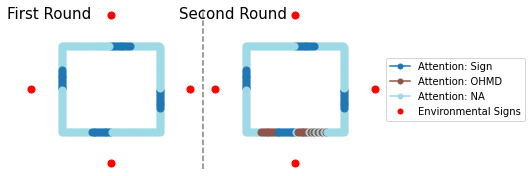

In [5]:
# Map the attentions to indices and colors
attention_to_index = {att: idx for idx, att in enumerate(set(attentions))}
attention_indices = [attention_to_index[att] for att in attentions]
unique_attention_indices = sorted(set(attention_indices))
colors = plt.cm.get_cmap('tab20', len(unique_attention_indices))
attention_colors = {index: colors(i) for i, index in enumerate(unique_attention_indices)}
# attention_colors = {index: colors(i) for i, index in enumerate(sorted(set(attentions)))}

# # Example using a predefined colormap
# num_labels = len(set(attentions))
# color_palette = plt.cm.get_cmap('tab20', num_labels)
# # Example with a manual list of colors (extend this list as needed)
# manual_color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


###################################################################################
# Invert the attention_to_index dictionary to map indices back to original attentions - THE PLACE WHERE I GET ORIGINAL LABELS
index_to_attention = {idx: att for att, idx in attention_to_index.items()}
###################################################################################

# Create the figure and axes with more space between the rectangles
fig, ax = plt.subplots(figsize=(15, 7))

# Function to calculate the position along the perimeter of the rectangle
def calculate_rectangle_position(pos, width, height, sign_offset=0):
    # Start from the right-bottom corner, so the sides are: 7, 8, 7, 8 (height, width, height, width)
    if pos <= height:  # Right side
        return width+sign_offset, pos
    elif height < pos <= (height + width): # Top side
        return width - (pos - height), height+sign_offset
    elif (height + width) < pos <= (height + width + height): # Left side
        return 0-sign_offset, height - (pos - (height + width))
    else: # Bottom side
        return (pos - (height + width + height)), 0-sign_offset

# Modified function to plot attentions based on walking positions on the rectangles
def plot_attentions_on_rectangle(ax, walking_positions, attentions, perimeter, width, height, left_offset_x, right_offset_x):

    # Draw the attention scatter points
    for pos, att_index in zip(walking_positions, attentions):
        # Determine the position on the rectangle
        pos_x, pos_y = calculate_rectangle_position(pos % perimeter, width, height)
        
        # Adjust x position based on whether the position is in the first or second round
        if pos < perimeter:  # First round, left rectangle
            pos_x += left_offset_x
        else:  # Second round, right rectangle
            pos_x += right_offset_x
        
#         print(att_index)
        
#         color = manual_color_palette[att_index]
        color = attention_colors[att_index]
        # Draw a dot for the attention allocation
        ax.scatter(pos_x, pos_y, color=color, s=50)  # s is the size of the dot

def plot_sign_positions(sign_positions, sign_offset, left_offset_x, right_offset_x):
    # Draw sign positions
    for sign_pos in sign_positions:
        # Determine the position on the rectangle
        pos_x, pos_y = calculate_rectangle_position(sign_pos % perimeter, width, height, sign_offset)   # There are some issues
        
        # Adjust x position based on whether the position is in the first or second round
        if sign_pos < perimeter:  # First round, left rectangle
            pos_x += left_offset_x
        else:  # Second round, right rectangle
            pos_x += right_offset_x
        
        color = 'red'
        # Draw a dot for the sign positions
        ax.scatter(pos_x, pos_y, color=color, s=50)  # s is the size of the dot

# Calculate the offsets for the left and right rectangles
left_rect_offset = 3
rectangle_offset = 7
right_rect_offset = left_rect_offset + width + rectangle_offset  # 5 units of space between rectangles
sign_offset = 2.5

# Plot attentions on the left and right rectangles based on walking position
plot_attentions_on_rectangle(ax, walking_positions, attention_indices, perimeter, width, height, left_rect_offset, right_rect_offset)

# Plot sign positions
plot_sign_positions(sign_positions=sign_positions, sign_offset=sign_offset, left_offset_x=left_rect_offset, right_offset_x=right_rect_offset)

# Calculate the position where the vertical separation line should be drawn
separation_line_x = left_rect_offset + width + rectangle_offset / 2

# Draw a vertical line to separate the two rectangles
ax.axvline(x=separation_line_x, color='grey', linestyle='--')

# Annotations for 'first round' and 'second round'
ax.text(left_rect_offset-1, height + 2, 'First Round', ha='center', va='bottom', fontsize=15)
ax.text(right_rect_offset-1, height + 2, 'Second Round', ha='center', va='bottom', fontsize=15)

# Set the plot limits
ax.set_xlim(-1, right_rect_offset + width + sign_offset + 0.5)  # Adjust for spacing between rectangles and borders
ax.set_ylim(-3, height + 3)

# Keep the aspect ratio square
ax.set_aspect('equal')

# Remove axis labels and ticks
ax.axis('off')

###################################################################################
attention_legend_handles = [
    plt.Line2D([0], [0], marker='o', color=color, label=f'Attention: {index_to_attention[idx]}', markersize=5)
    for idx, color in attention_colors.items()
]

# Add a legend handle for 'environmental signs'
environmental_signs_handle = plt.Line2D([0], [0], marker='o', color='red', linestyle='None', label='Environmental Signs', markersize=5)
attention_legend_handles.append(environmental_signs_handle)

ax.legend(handles=attention_legend_handles, loc='center left', bbox_to_anchor=(1, 0.5))
###################################################################################

# Save the figure
save_fig_path = f'{prefix}/0dot{weight_str_after_decimal}-step_by_step_attention_allocation.png'
fig.savefig(save_fig_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

### Reading speed plot

{0: 'Walking Slowly (0.9 if)'}


<ipython-input-6-8122163a365b>:119: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


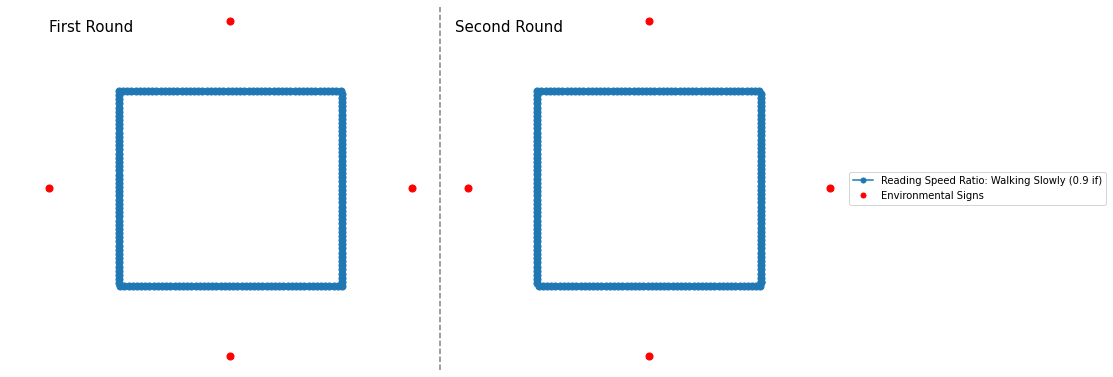

In [6]:
# Map the reading ratios to indices and colors
reading_ratios_to_index = {att: idx for idx, att in enumerate(set(reading_ratios))}
reading_ratios_indices = [reading_ratios_to_index[att] for att in reading_ratios]
unique_reading_ratios_indices = sorted(set(reading_ratios_indices))
colors = plt.cm.get_cmap('tab20', len(unique_reading_ratios_indices))
reading_ratios_colors = {index: colors(i) for i, index in enumerate(unique_reading_ratios_indices)}
# reading_ratios_colors = {index: colors(i) for i, index in enumerate(set(reading_ratios))}

###################################################################################
# Invert the attention_to_index dictionary to map indices back to original attentions - THE PLACE WHERE I GET ORIGINAL LABELS
index_to_reading_ratios = {idx: rr for rr, idx in reading_ratios_to_index.items()}
index_to_reading_ratios[0] = 'Walking Slowly (0.9 if)'
print(index_to_reading_ratios)
###################################################################################

# Define dimensions for the visualization
height = 7   # 7
width = 8   # 8
perimeter = 2 * (width + height)

# Create the figure and axes with more space between the rectangles
fig, ax = plt.subplots(figsize=(15, 7))

# Function to calculate the position along the perimeter of the rectangle
def calculate_rectangle_position(pos, width, height, sign_offset=0):
    # Start from the right-bottom corner, so the sides are: 7, 8, 7, 8 (height, width, height, width)
    if pos <= height:  # Right side
        return width+sign_offset, pos
    elif height < pos <= (height + width): # Top side
        return width - (pos - height), height+sign_offset
    elif (height + width) < pos <= (height + width + height): # Left side
        return 0-sign_offset, height - (pos - (height + width))
    else: # Bottom side
        return (pos - (height + width + height)), 0-sign_offset

# Modified function to plot attentions based on walking positions on the rectangles
def plot_reading_ratios_on_rectangle(ax, walking_positions, reading_ratios, perimeter, width, height, left_offset_x, right_offset_x):

    # Draw the reading speed ratios scatter points
    for pos, reading_ratio_index in zip(walking_positions, reading_ratios):
        # Determine the position on the rectangle
        pos_x, pos_y = calculate_rectangle_position(pos % perimeter, width, height)
        
        # Adjust x position based on whether the position is in the first or second round
        if pos < perimeter:  # First round, left rectangle
            pos_x += left_offset_x
        else:  # Second round, right rectangle
            pos_x += right_offset_x
        
        color = reading_ratios_colors[reading_ratio_index]
        # Draw a dot for the attention allocation
        ax.scatter(pos_x, pos_y, color=color, s=50)  # s is the size of the dot

def plot_sign_positions(sign_positions, sign_offset, left_offset_x, right_offset_x):
    # Draw sign positions
    for sign_pos in sign_positions:
        # Determine the position on the rectangle
        pos_x, pos_y = calculate_rectangle_position(sign_pos % perimeter, width, height, sign_offset)   # There are some issues
        
        # Adjust x position based on whether the position is in the first or second round
        if sign_pos < perimeter:  # First round, left rectangle
            pos_x += left_offset_x
        else:  # Second round, right rectangle
            pos_x += right_offset_x
        
        color = 'red'
        # Draw a dot for the sign positions
        ax.scatter(pos_x, pos_y, color=color, s=50)  # s is the size of the dot

# Calculate the offsets for the left and right rectangles
rectangle_offset = 7
left_rect_offset = 3
right_rect_offset = left_rect_offset + width + rectangle_offset  # 5 units of space between rectangles
sign_offset = 2.5

# Plot attentions on the left and right rectangles based on walking position
plot_reading_ratios_on_rectangle(ax, walking_positions, reading_ratios_indices, perimeter, width, height, left_rect_offset, right_rect_offset)

# Plot sign positions
plot_sign_positions(sign_positions=sign_positions, sign_offset=sign_offset, left_offset_x=left_rect_offset, right_offset_x=right_rect_offset)

# Calculate the position where the vertical separation line should be drawn
separation_line_x = left_rect_offset + width + rectangle_offset / 2

# Draw a vertical line to separate the two rectangles
ax.axvline(x=separation_line_x, color='grey', linestyle='--')

# Annotations for 'first round' and 'second round'
ax.text(left_rect_offset-1, height + 2, 'First Round', ha='center', va='bottom', fontsize=15)
ax.text(right_rect_offset-1, height + 2, 'Second Round', ha='center', va='bottom', fontsize=15)

# Set the plot limits
ax.set_xlim(-1, right_rect_offset + width + sign_offset + 0.5)  # Adjust for spacing between rectangles and borders
ax.set_ylim(-3, height + 3)

# Keep the aspect ratio square
ax.set_aspect('equal')

# Remove axis labels and ticks
ax.axis('off')

###################################################################################
attention_legend_handles = [
    plt.Line2D([0], [0], marker='o', color=color, label=f'Reading Speed Ratio: {index_to_reading_ratios[idx]}', markersize=5)
    for idx, color in reading_ratios_colors.items()
]

# Add a legend handle for 'environmental signs'
environmental_signs_handle = plt.Line2D([0], [0], marker='o', color='red', linestyle='None', label='Environmental Signs', markersize=5)
attention_legend_handles.append(environmental_signs_handle)

ax.legend(handles=attention_legend_handles, loc='center left', bbox_to_anchor=(1, 0.5))
###################################################################################

# Save the figure
fig.savefig(f'{prefix}/0dot{weight_str_after_decimal}-step_by_step_reading_ratios.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

### TODO: add other metrics: walking speed and reading speed.

### TODO: determine other metrics, the above is just a step-to-step figure.
Reference: https://docs.google.com/document/d/1muSs8ohGp4esWpXY1I1Nw6WxcSWxobyu05j-AC1Wmug/edit#heading=h.8iojcj90q8ne

The aggregated metrics need to compare:
1. The attention allocation.
2. The walking speed control.
3. Reading speed ratio (corresponds to study 2).
4. Reading resumption behaviors (corresponds to study 3) - just do the parameter inference on L100: reading resumption time cost and error rate.